# Module 2 part 2: QC 

Welcome to the course! There are some very important instructions for you to follow:

1.) Click on File on the top left corner and select save a copy in drive

**Your changes will not be saved if you do not do this step**

2.) Click on the name of the workbook in the top left corner and replace "Copy of" with your full name

**You will be submitting the downloaded notebook file as your proof of completion for this module**


Please type: 
```
print("Yes, I have done step 1") 
```
into the code block below, then run by clicking the "triangle"/"Play" icon on that block 



In [ ]:
#this block will be checked

Please type: 
```
print("Yes, I have completed step 2") 
```
into the code block below, then run by clicking the "triangle"/"Play" icon on that block 



In [ ]:
#this block will be checked

# Installing Conda
Conda is a versatile software management tool. Conda is an open source system of managing tools and libraries. More info on the library used to install conda on Google Colab is at this [website](https://inside-machinelearning.com/en/how-to-install-use-conda-on-google-colab/)

Note - your runtime will refresh and reconnect after running this. It will say runtime crashed, this seems normal, wait for the session to reconnect after this.


You can check out this repo for how this tool works:
https://github.com/conda-incubator/condacolab 


In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

# Module 2 Part 2 - NGS file formats and data & QC
This practical was adapted from the course - [Viral Genomics and Bioformatics Asia, 2022](https://wcscourses.github.io/ViralBioinfAsia2022/). The NGS File formats and data QC components module was created by [David Studholme (Univ. of Exeter)](https://biosciences.exeter.ac.uk/staff/profile/index.php?web_id=david_studholme).


This is a general module to help you get familiarised with data formats in a practical way. Data QC and making a consensus sequence will be explored in more detail in later modules.
 



In this session, we are going to perform some quality control (QC) on some FASTQ-formatted sequence data.



# Public repositories of NGS data 
The Sequence Read Archive (SRA) contains a huge number of sequence reads generated by various NGS methods. We can browse this data on the web via the NCBI's web portal. We can also download NGS datasets in FastQ format and analyse them locally, for example in our virtual machine. Let's a take a look at an example dataset: [SRR19504912](https://www.ncbi.nlm.nih.gov/sra/?term=SRR19504912)

. Which virus does this sequencing dataset come from?

Let's use the web interface to take a look at a few of the sequence reads in this dataset. Click on where it says [SRR19504912](https://trace.ncbi.nlm.nih.gov/Traces/sra/?run=SRR19504912) under 'Run'. Then click on the 'Reads' tab. This will take you to [this page](https://trace.ncbi.nlm.nih.gov/Traces/index.html?view=run_browser&page_size=10&acc=SRR19504912&display=reads), which looks like this:

![enter image description here](https://github.com/WCSCourses/ViralBioinfAsia2022/raw/main/course_data/NGS_file_formats_and_data_QC/images/Screenshot%202022-07-31%20at%2016.05.10.png)

In the figure above, we can see a single sequence read along with the quality scores for each nucleotide position in its sequence. Notice that the scores are high (well above 30) for most of this sequence read.

Now let's download the sequence data (i.e. the whole set of reads) from this sequencing run from the SRA. Unfortunately it is not easy to download the data directly from the NCBI website; instead we have to use the *fasterq-dump* tool from the [NCBI's SRA Toolkit](https://github.com/ncbi/sra-tools/wiki/01.-Downloading-SRA-Toolkit). So, first execute this command in the Terminal:

In [ ]:
#download the SRA toolkit using wget
!wget --output-document sratoolkit.tar.gz https://ftp-trace.ncbi.nlm.nih.gov/sra/sdk/current/sratoolkit.current-ubuntu64.tar.gz


In [ ]:
#Unpack the downloaded file using  tar - tar is an excellent tool to pack and unpack files
!tar -vxzf sratoolkit.tar.gz

In [ ]:
#the following commands add the toolkit to the expected places where tools can be found on Colab
!export PATH=$PATH:$PWD/sratoolkit.3.0.0-ubuntu64/bin; which fastq-dump


In [ ]:
# this command runs a config for using NCBI SRA to access data, it usually runs with a interactive session, but that fails on colab
# this is the interactive command, it will cause a segmentation fault, but you must run
!sratoolkit.3.0.0-ubuntu64/bin/vdb-config --interactive


In [ ]:
#this command runs without the interactive, and somehow allows the the subsequent commands to work is colab
#NB this may not work indefinetly on colab with SRA tools
# if this command fails, you may use wget https://wcs_data_transfer.cog.sanger.ac.uk/SRR19504912.zip then unzip
!sratoolkit.3.0.0-ubuntu64/bin/vdb-config

In [ ]:
# this command uses the fasterq-dump tool to download the SRR19504912 dataset
!sratoolkit.3.0.0-ubuntu64/bin/fasterq-dump SRR19504912 


You should then see some output something like this:

    spots read      : 306,691
    reads read      : 613,382
    reads written   : 613,382

you will notice that new files have been created called *SRR19504912_1.fastq*  and *SRR19504912_2.fastq*. There are two files because this dataset consists of paired sequence reads. 

In [ ]:
# now to install two key tools - fastqc and trim-galore
!conda install -c bioconda fastqc -y
!conda install -c bioconda trim-galore

In [ ]:
#this command will run on ANY fastq file in the directory
#We only have two here, but you may have thousands, consider the * operator carefully
!fastqc *.fastq

This will generate some messages something like this:

    Started analysis of SRR19504912_1.fastq
    Approx 5% complete for SRR19504912_1.fastq
    Approx 10% complete for SRR19504912_1.fastq
    ...
    Approx 90% complete for SRR19504912_1.fastq
    Approx 95% complete for SRR19504912_1.fastq
    Analysis complete for SRR19504912_1.fastq
    Started analysis of SRR19504912_2.fastq
    Approx 5% complete for SRR19504912_2.fastq
    Approx 10% complete for SRR19504912_2.fastq
    Approx 15% complete for SRR19504912_2.fastq
    ...
    Approx 90% complete for SRR19504912_2.fastq
    Approx 95% complete for SRR19504912_2.fastq
    Analysis complete for SRR19504912_2.fastq


Now, execute the command `ls -lh` and you should see some new files have appeared:


In [ ]:
#run the ls -lh command - what do the -l and -h operators do?
!ls -lh

Take a look at the first few lines of each file by executing this command:     
```
head *.fastq
```

In [ ]:
#try the head command here, try it for both, then individual files


We are most interested in the HTML files, which contain the FastQC reports for our two fastq files. To view the output, you will need to download and use the html file. To do so, click the "three dots" you will see when hovering over the .html file with your mouse pointer and download it, then open your download in a browser 

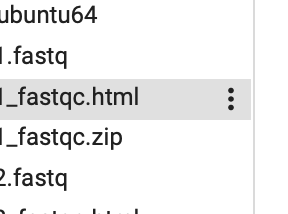

You should then see something like this:

![enter image description here](https://github.com/WCSCourses/ViralBioinfAsia2022/raw/main/course_data/NGS_file_formats_and_data_QC/images/Screenshot%202022-07-31%20at%2015.28.02.png)

Note that there are two tabs in the Firefox web browser; there is one for the QC report for *SRR19504912_1.fastq*  and another for *SRR19504912_2.fastq*.

There is a lot of QC information in these reports. Feel free to explore these in your own time and take a look at the FastQC homepage at https://www.bioinformatics.babraham.ac.uk/projects/fastqc/ and see the tutorial video at http://www.youtube.com/watch?v=bz93ReOv87Y.

For now, we are just going to look at
- Basic statistics
- Per-base sequence quality 
- Adapter content

### Questions:

 - How many sequence reads are there? Does your answer match your
   previous answer (based on `wc -l`) ?
 - With respect to quality scores, which of the two files has better-quality data: *SRR19504912_1.fastq* or *SRR19504912_2.fastq*.
 - Are these datasets contaminated with any Illumina sequencing adapter oligonucleotides?



Add your answers to the questions here: (double click a text block to edit) 

Sequence reads:

Quality:

Contamination:

## Trimming and filtering to remove poor-quality data

When you inspected the FastQC reports, you probably noticed that *SRR19504912_1.fastq* and *SRR19504912_2.fastq* include some sequence reads that contain very poor quality scores and some reads that are derived from the Illumina adapters rather than from the target viral nucleotide sequences. Now, we are going to look at how we can remove poor data and contamination by trimming and filtering. We will use [TrimGalore](https://www.bioinformatics.babraham.ac.uk/projects/trim_galore/) by executing the following command

In [ ]:
!trim_galore -q 25 --length 50 --paired SRR19504912_1.fastq SRR19504912_2.fastq

Now, when you list the contents of the directory with ls -lh, you will notice two new files called SRR19504912_1_val_1.fq and SRR19504912_2_val_2.fq. These are the trimmed-and-filtered versions of original files SRR19504912_1.fastq and SRR19504912_2.fastq. Now, let’s run FastQC on these two new ‘cleaned’ files:


In [ ]:
#run the ls -lh command

In [ ]:
#run fastqc *.fq
!fastqc *.fq


This will create QC reports, in HTML format, for the cleaned FASTQ files. Now let’s take a look at these files like you did earlier by downloading the html file and opening it in a browser

### Questions:

 - How many reads were removed by TrimGalore from each FASTQ file?
 - What impact has TrimGalore had upon the lengths of the sequence reads?
 - What impact has TrimGalore had upon adapter contamination?
 - Has TrimGalore altered  the distribution of quality scores?
 
 You can read more about TrimGalore at https://www.bioinformatics.babraham.ac.uk/projects/trim_galore/.

Congratulations on reaching the end of this session! You should now be familiar with some of the most common file formats used in analysing NGS data and you know how to access and perform some basic QC on datasets of NGS sequence reads.


Answer your questions here:

 - How many reads were removed by TrimGalore from each FASTQ file?
 
 - What impact has TrimGalore had upon the lengths of the sequence reads?

 - What impact has TrimGalore had upon adapter contamination?

 - Has TrimGalore altered  the distribution of quality scores?
 


### Bonus!

#### What if you had a large number of FastQC reports to analyze?

Multiqc (https://multiqc.info/) is a tool that summarizes different types of NGS reports (not just FastQC).

First, install the tool:

    pip install multiqc

In the folder with reports, run:

    multiqc .

See summarized report in a browser - multiqc_report.html


In [ ]:
#try the bonus commands here and below :-D 
!pip install multiqc

In [ ]:
!multiqc .

## **Credits:**
Progress Dube

Marcela Suarez Esquivel

Liegh Jackson

Keerthana Kutchi (Intro to Unix Commands)

David Studholme  (Introduction to NGS formats and QC)

COG-Train
Welcome Connection Science